# Import Needed Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
colors = ["#8c0404","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

# Reading and Cleaning Dataset

In [3]:
import os
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /Users/xiaoyulu/Untitled Folder


In [12]:
df = pd.read_csv("/Users/xiaoyulu/Untitled Folder/spotify-2023.csv", encoding = 'latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [17]:
#shape of the dataset
print(f"Number of column: {df.shape[1]}\nNumber of rows:{df.shape[0]}")

Number of column: 24
Number of rows:953


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [20]:
#check for missing values
missing_values = df.isnull().sum()

missing_values[missing_values>0]

in_shazam_charts    50
key                 95
dtype: int64

**I will not delete any missing values as I don't think they will affect EDA result**

In [21]:
#Get basic statistics of the numerical columns
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [22]:
#Compute descriptive statistics for all columns in df 
#expect for the numberical columns
df.describe(exclude = np.number)

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
count,953,953,953,953,903,858,953
unique,943,645,949,348,198,11,2
top,Daylight,Taylor Swift,723894473,0,0,C#,Major
freq,2,34,2,24,344,120,550


In [23]:
#Total number of duplicate rows in df
df.duplicated().sum()

0

# Visulaization

In [32]:
df['artist(s)_name'].value_counts()
n_of_artists = len(df['artist(s)_name'].value_counts())
print(f"Numbers of Artists:{n_of_artists}")

Numbers of Artists:645


In [34]:
top_artists = df['artist(s)_name'].value_counts().head(10)

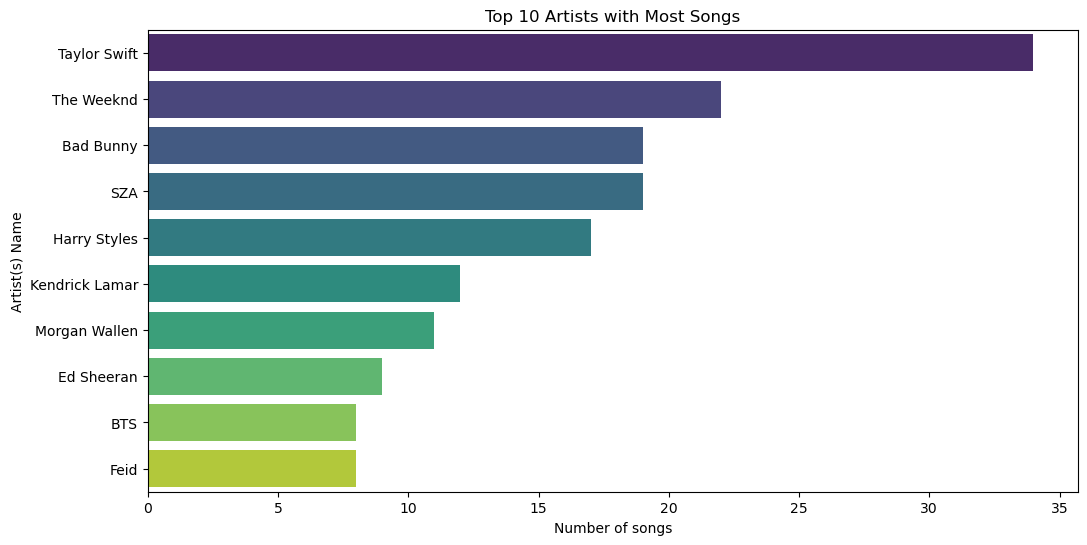

In [38]:
plt.figure(figsize = (12,6))
sns.barplot(
    x=top_artists.values, 
    y = top_artists.index,
    palette = 'viridis')

plt.xlabel('Number of songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()

In [42]:
print(f"\033[1mHere are top 10 artists with the most songs in the dataset:\033[0m\n{top_artists}")

Here are top 10 artists with the most songs in the dataset:
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artist(s)_name, dtype: int64


In [55]:
#Remove non-numeric values from 'streams' column and convert to integer
df['streams'] = pd.to_numeric(df['streams'],errors = 'coerce')

In [56]:
#Top 10 songs with most streams on Spotify
top_spotify_streams = df[['track_name', 'artist(s)_name', 'streams']].sort_values(by = 'streams',ascending=False).head(10)

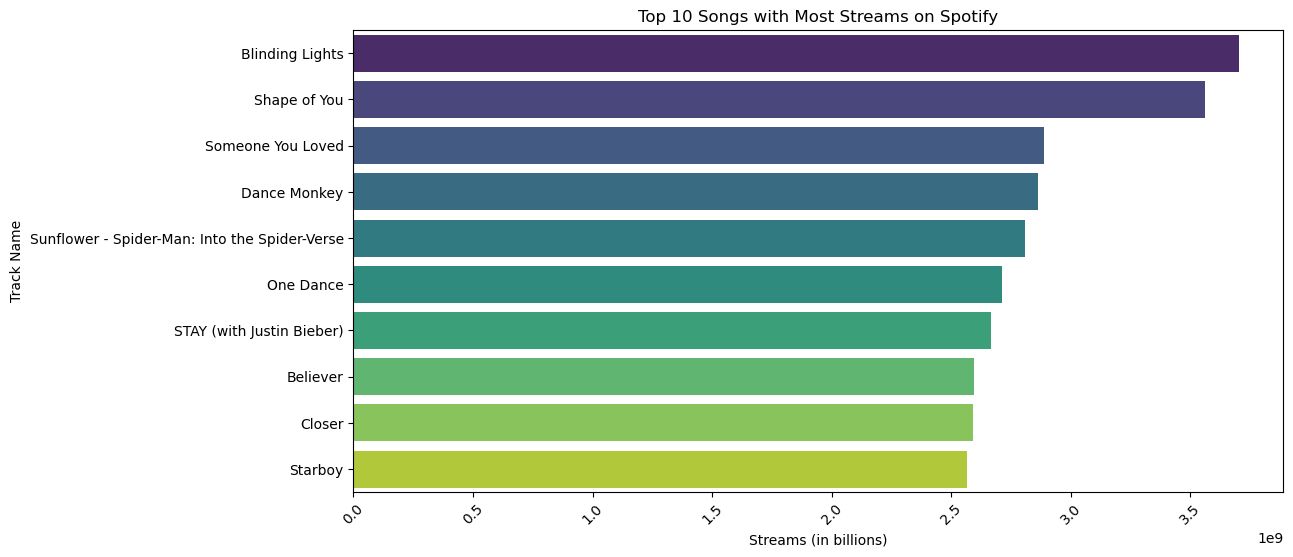

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_spotify_streams['streams'], y=top_spotify_streams['track_name'], palette='viridis')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Most Streams on Spotify')
plt.xticks(rotation=45)
plt.show()

In [59]:
top_spotify_streams

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


**Here are the top 10 songs with the most streams on Spotify:**

1. "Blinding Lights" by The Weeknd: ~3.70 billion streams
2. "Shape of You" by Ed Sheeran: ~3.56 billion streams
3. "Someone You Loved" by Lewis Capaldi: ~2.89 billion streams
4. "Dance Monkey" by Tones and I: ~2.86 billion streams
5. "Sunflower - Spider-Man: Into the Spider-Verse" by Post Malone, Swae Lee: ~2.81 billion streams
6. "One Dance" by Drake, WizKid, Kyla: ~2.71 billion streams
7. "STAY (with Justin Bieber)" by Justin Bieber, The Kid Laroi: ~2.67 billion streams
8. "Believer" by Imagine Dragons: ~2.59 billion streams
9. "Closer" by The Chainsmokers, Halsey: ~2.59 billion streams
10. "Starboy" by The Weeknd, Daft Punk: ~2.57 billion streams

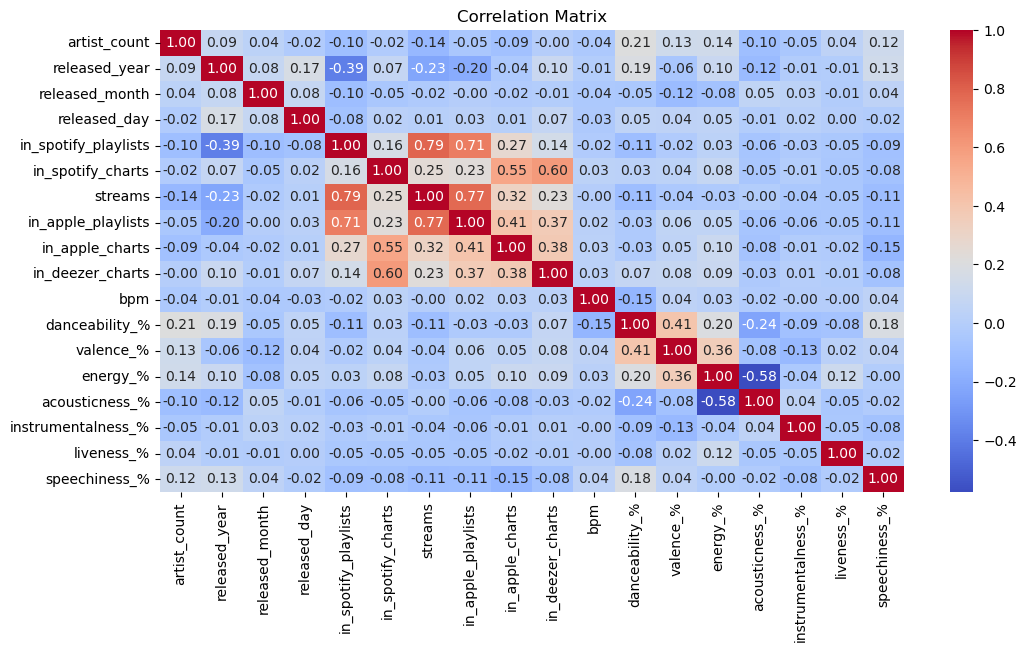

In [61]:
numeric_df = df.select_dtypes(include = ['float64','int64'])

#Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize = (12,6))
sns.heatmap(correlation_matrix,annot = True, cmap = 'coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

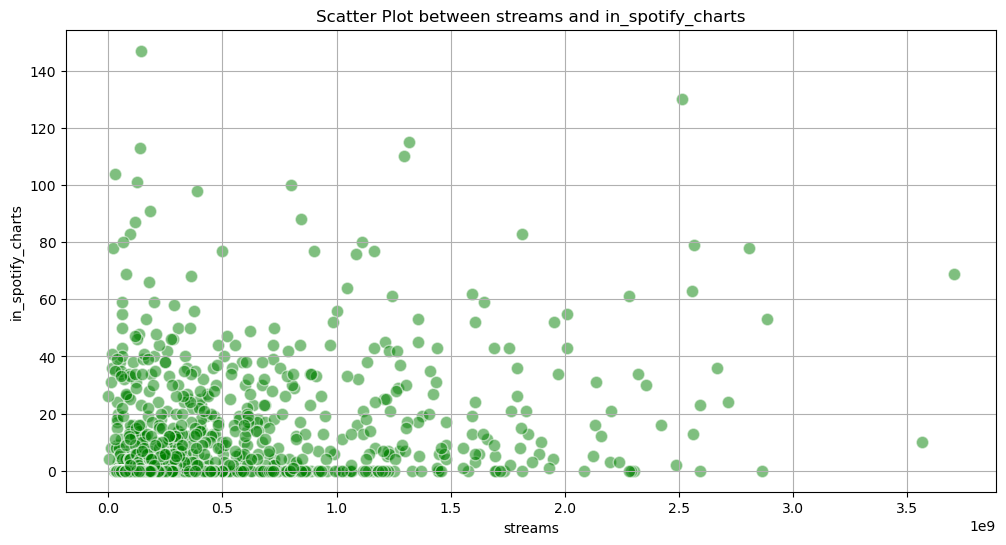

In [67]:
plt.figure(figsize=(12, 6))

plt.scatter(df['streams'], df['in_spotify_charts'], color='green' , alpha=0.5, edgecolors='w', s=80)
plt.title('Scatter Plot between streams and in_spotify_charts')
plt.xlabel('streams')
plt.ylabel('in_spotify_charts')
plt.grid(True)
plt.show()

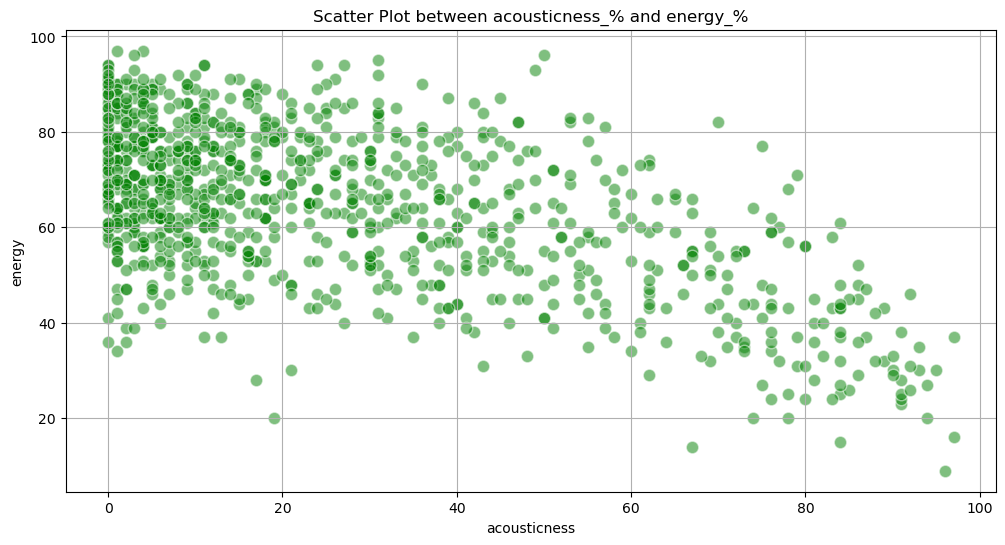

In [68]:
plt.figure(figsize=(12, 6))

plt.scatter(df['acousticness_%'], df['energy_%'], color='green' , alpha=0.5, edgecolors='w', s=80)
plt.title('Scatter Plot between acousticness_% and energy_%')
plt.xlabel('acousticness')
plt.ylabel('energy')
plt.grid(True)
plt.show()

In [69]:
songs_by_year = df['released_year'].value_counts().reset_index()
songs_by_year.columns = ['released_year', 'count']

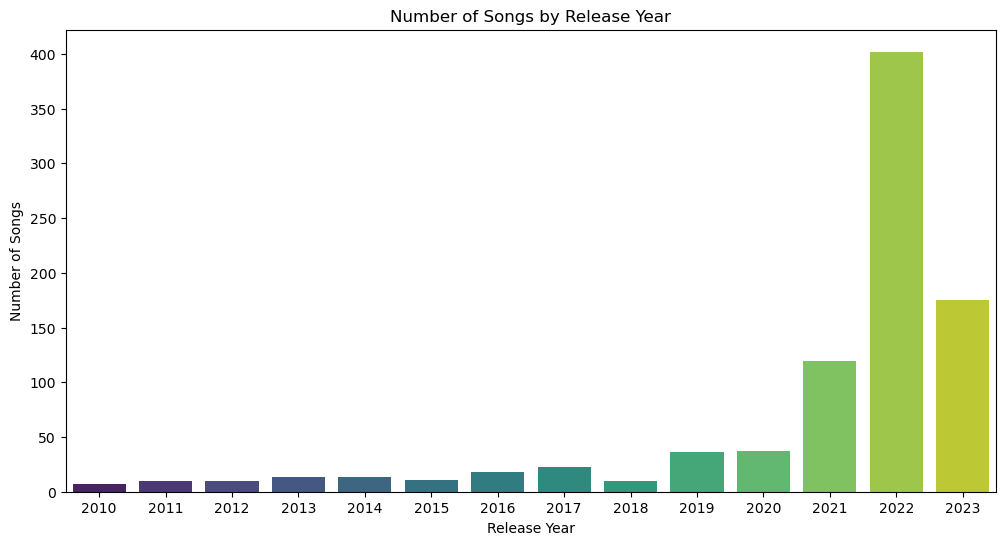

In [70]:
# Plotting using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='count', data=songs_by_year.head(14), palette='viridis')
plt.title('Number of Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.show()